#Part 1:

## Code:

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [32]:
# Define polynomial equations

def polynomial_equations(X):
    x1, x2, x3, x4, x5, x6, x7, x8 = X.T

    y1 = (2 * x1 * x3) - (x1 * x5) + (x3 * x8) + (2 * x1**2 * x8) + x5
    y2 = (x1 * x5 * x6) - (x3 * x4) - (3 * x2 * x3) + (2 * x2**2 * x4) - (2 * x7 * x8) - 1
    y3 = (2 * x3**2) - (x5 * x7) - (3 * x1 * x4 * x6) + (x1**2 * x2 * x4) - 1
    y4 = (-x6**3) + (2.1 * x1 * x3 * x8) - (x1 * x4 * x7) - (3.2 * x5**2 * x2 * x4) - x8
    y5 = (x1**2 * x5) - (3 * x3 * x4 * x8) + (x1 * x2 * x4) - (3 * x6) + (x1**2 * x7) + 2

    return np.vstack([y1, y2, y3, y4, y5]).T


In [33]:
def add_noise(Y, noise_std=0.001, noise_ratio=0.3,seed=23):
    num_noisy_samples = int(Y.shape[0] * noise_ratio)
    np.random.seed(seed)
    noisy_indices = np.random.choice(Y.shape[0], num_noisy_samples, replace=False)
    noise = np.zeros_like(Y)
    noise[noisy_indices] = np.random.normal(0, noise_std, Y.shape)[noisy_indices]
    return Y + noise

In [35]:
def generate_data(N, noise_std=0.001, noise_ratio=0.1,seed=41):
    np.random.seed(seed)
    X = np.random.uniform(-1, 1, (N, 8))
    Y = polynomial_equations(X)
    Y = add_noise(Y, noise_std, noise_ratio)
    return X, Y

In [40]:
# Generate training and validation data
N_t, N_v = 1000, 500
X_train, Y_train = generate_data(N_t)
X_val, Y_val = generate_data(N_v, noise_std=0, noise_ratio=0,seed=53)  # No noise in validation set

In [37]:
def create_ffnn(hidden_layers=[6, 6, 6], activation_functions=['relu', 'tanh', 'tanh']):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation=activation_functions[0], input_shape=(8,)))
    model.add(Dense(hidden_layers[1], activation=activation_functions[1]))
    model.add(Dense(hidden_layers[2], activation=activation_functions[2]))
    model.add(Dense(5))  # Output layer updated to 5 neurons

    return model

In [60]:
def train_model(model, learning_rate=0.01, epochs=100,X_train=X_train,Y_train=Y_train):
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
                  loss='mse', metrics=['mse'])

    history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, verbose=2)
    return history

Epoch 1/100
32/32 - 2s - 48ms/step - loss: 2.6326 - mse: 2.6326 - val_loss: 2.4274 - val_mse: 2.4274
Epoch 2/100
32/32 - 0s - 8ms/step - loss: 2.1997 - mse: 2.1997 - val_loss: 2.0763 - val_mse: 2.0763
Epoch 3/100
32/32 - 0s - 12ms/step - loss: 1.9177 - mse: 1.9177 - val_loss: 1.8644 - val_mse: 1.8644
Epoch 4/100
32/32 - 1s - 20ms/step - loss: 1.7531 - mse: 1.7531 - val_loss: 1.7319 - val_mse: 1.7319
Epoch 5/100
32/32 - 0s - 14ms/step - loss: 1.6522 - mse: 1.6522 - val_loss: 1.6512 - val_mse: 1.6512
Epoch 6/100
32/32 - 0s - 10ms/step - loss: 1.5871 - mse: 1.5871 - val_loss: 1.5953 - val_mse: 1.5953
Epoch 7/100
32/32 - 0s - 9ms/step - loss: 1.5371 - mse: 1.5371 - val_loss: 1.5477 - val_mse: 1.5477
Epoch 8/100
32/32 - 0s - 5ms/step - loss: 1.4901 - mse: 1.4901 - val_loss: 1.4998 - val_mse: 1.4998
Epoch 9/100
32/32 - 0s - 10ms/step - loss: 1.4415 - mse: 1.4415 - val_loss: 1.4494 - val_mse: 1.4494
Epoch 10/100
32/32 - 0s - 9ms/step - loss: 1.3868 - mse: 1.3868 - val_loss: 1.3951 - val_mse: 

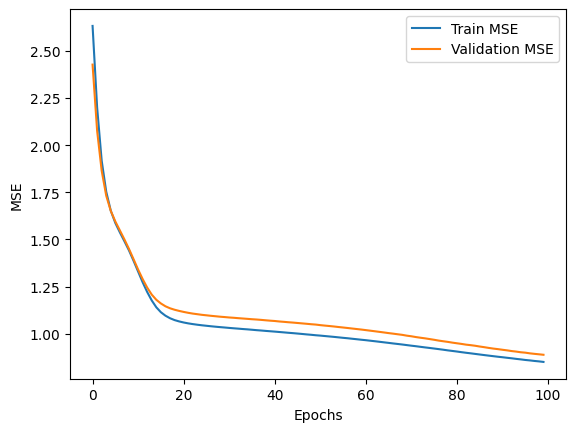

In [41]:
# Initialize Model and Train
model = create_ffnn()
history = train_model(model)

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/100
32/32 - 1s - 39ms/step - loss: 2.5815 - mse: 2.5815 - val_loss: 2.3696 - val_mse: 2.3696
Epoch 2/100
32/32 - 0s - 11ms/step - loss: 2.1878 - mse: 2.1878 - val_loss: 2.0469 - val_mse: 2.0469
Epoch 3/100
32/32 - 1s - 20ms/step - loss: 1.9454 - mse: 1.9454 - val_loss: 1.8536 - val_mse: 1.8536
Epoch 4/100
32/32 - 0s - 15ms/step - loss: 1.8026 - mse: 1.8026 - val_loss: 1.7343 - val_mse: 1.7343
Epoch 5/100
32/32 - 0s - 9ms/step - loss: 1.7172 - mse: 1.7172 - val_loss: 1.6617 - val_mse: 1.6617
Epoch 6/100
32/32 - 0s - 9ms/step - loss: 1.6604 - mse: 1.6604 - val_loss: 1.6127 - val_mse: 1.6127
Epoch 7/100
32/32 - 0s - 9ms/step - loss: 1.6154 - mse: 1.6154 - val_loss: 1.5687 - val_mse: 1.5687
Epoch 8/100
32/32 - 0s - 9ms/step - loss: 1.5727 - mse: 1.5727 - val_loss: 1.5245 - val_mse: 1.5245
Epoch 9/100
32/32 - 0s - 5ms/step - loss: 1.5275 - mse: 1.5275 - val_loss: 1.4807 - val_mse: 1.4807
Epoch 10/100
32/32 - 0s - 9ms/step - loss: 1.4795 - mse: 1.4795 - val_loss: 1.4307 - val_mse: 1.

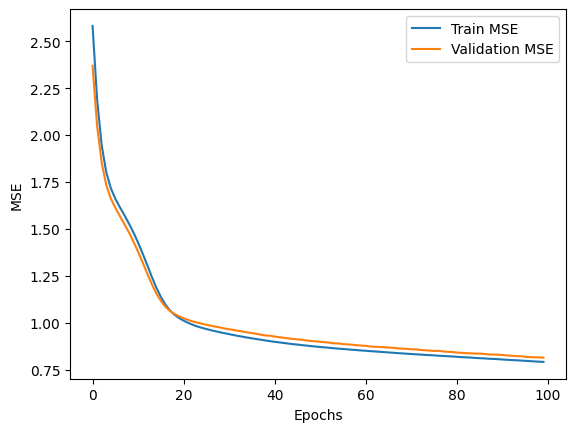

In [42]:
# Model With Different Activation Functions - 1
model_2 = create_ffnn(activation_functions=['tanh', 'leaky_relu', 'linear'])
history_2 = train_model(model_2)

# Plot Training & Validation Loss
plt.plot(history_2.history['loss'], label='Train MSE')
plt.plot(history_2.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/100
32/32 - 1s - 26ms/step - loss: 2.3849 - mse: 2.3849 - val_loss: 2.0982 - val_mse: 2.0982
Epoch 2/100
32/32 - 0s - 13ms/step - loss: 1.8909 - mse: 1.8909 - val_loss: 1.7429 - val_mse: 1.7429
Epoch 3/100
32/32 - 0s - 9ms/step - loss: 1.6396 - mse: 1.6396 - val_loss: 1.5727 - val_mse: 1.5727
Epoch 4/100
32/32 - 0s - 10ms/step - loss: 1.5135 - mse: 1.5135 - val_loss: 1.4764 - val_mse: 1.4764
Epoch 5/100
32/32 - 0s - 9ms/step - loss: 1.4321 - mse: 1.4321 - val_loss: 1.4087 - val_mse: 1.4087
Epoch 6/100
32/32 - 0s - 5ms/step - loss: 1.3659 - mse: 1.3659 - val_loss: 1.3519 - val_mse: 1.3519
Epoch 7/100
32/32 - 0s - 5ms/step - loss: 1.3074 - mse: 1.3074 - val_loss: 1.3034 - val_mse: 1.3034
Epoch 8/100
32/32 - 0s - 10ms/step - loss: 1.2578 - mse: 1.2578 - val_loss: 1.2623 - val_mse: 1.2623
Epoch 9/100
32/32 - 0s - 10ms/step - loss: 1.2157 - mse: 1.2157 - val_loss: 1.2267 - val_mse: 1.2267
Epoch 10/100
32/32 - 0s - 5ms/step - loss: 1.1800 - mse: 1.1800 - val_loss: 1.1964 - val_mse: 1

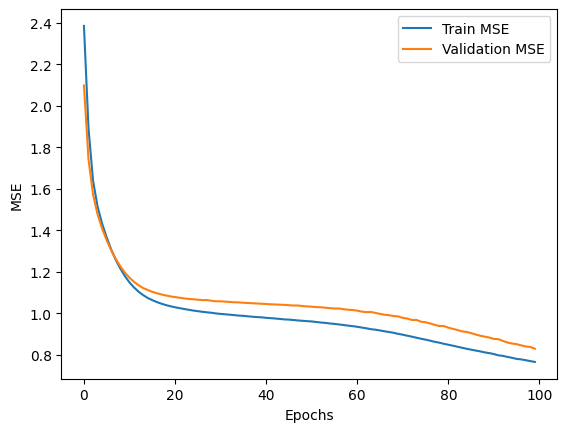

In [43]:
# Model With Different Activation Functions - 2
model_3 = create_ffnn(activation_functions=['relu', 'relu', 'linear'])
history_3 = train_model(model_3)

# Plot Training & Validation Loss
plt.plot(history_3.history['loss'], label='Train MSE')
plt.plot(history_3.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/100
32/32 - 1s - 26ms/step - loss: 2.5872 - mse: 2.5872 - val_loss: 2.3857 - val_mse: 2.3857
Epoch 2/100
32/32 - 0s - 14ms/step - loss: 2.1113 - mse: 2.1113 - val_loss: 1.9650 - val_mse: 1.9650
Epoch 3/100
32/32 - 0s - 5ms/step - loss: 1.7905 - mse: 1.7905 - val_loss: 1.6835 - val_mse: 1.6835
Epoch 4/100
32/32 - 0s - 5ms/step - loss: 1.5808 - mse: 1.5808 - val_loss: 1.5110 - val_mse: 1.5110
Epoch 5/100
32/32 - 0s - 9ms/step - loss: 1.4450 - mse: 1.4450 - val_loss: 1.4005 - val_mse: 1.4005
Epoch 6/100
32/32 - 0s - 5ms/step - loss: 1.3478 - mse: 1.3478 - val_loss: 1.3262 - val_mse: 1.3262
Epoch 7/100
32/32 - 0s - 10ms/step - loss: 1.2756 - mse: 1.2756 - val_loss: 1.2711 - val_mse: 1.2711
Epoch 8/100
32/32 - 0s - 14ms/step - loss: 1.2205 - mse: 1.2205 - val_loss: 1.2294 - val_mse: 1.2294
Epoch 9/100
32/32 - 1s - 16ms/step - loss: 1.1779 - mse: 1.1779 - val_loss: 1.1973 - val_mse: 1.1973
Epoch 10/100
32/32 - 0s - 9ms/step - loss: 1.1460 - mse: 1.1460 - val_loss: 1.1732 - val_mse: 1

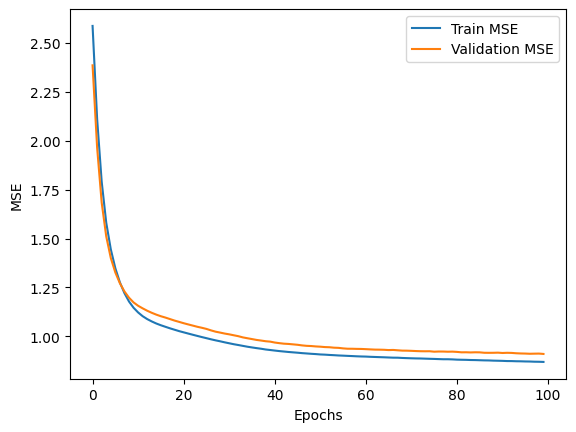

In [44]:
# Model With Different Activation Functions - 3
model_4 = create_ffnn(activation_functions=['tanh', 'leaky_relu', 'leaky_relu'])
history_4 = train_model(model_4)

# Plot Training & Validation Loss
plt.plot(history_4.history['loss'], label='Train MSE')
plt.plot(history_4.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/100
32/32 - 1s - 33ms/step - loss: 1.9638 - mse: 1.9638 - val_loss: 1.6256 - val_mse: 1.6256
Epoch 2/100
32/32 - 0s - 6ms/step - loss: 1.4469 - mse: 1.4469 - val_loss: 1.3296 - val_mse: 1.3296
Epoch 3/100
32/32 - 0s - 6ms/step - loss: 1.1932 - mse: 1.1932 - val_loss: 1.1717 - val_mse: 1.1717
Epoch 4/100
32/32 - 0s - 9ms/step - loss: 1.0835 - mse: 1.0835 - val_loss: 1.1141 - val_mse: 1.1141
Epoch 5/100
32/32 - 0s - 9ms/step - loss: 1.0441 - mse: 1.0441 - val_loss: 1.0930 - val_mse: 1.0930
Epoch 6/100
32/32 - 0s - 5ms/step - loss: 1.0241 - mse: 1.0241 - val_loss: 1.0809 - val_mse: 1.0809
Epoch 7/100
32/32 - 0s - 9ms/step - loss: 1.0133 - mse: 1.0133 - val_loss: 1.0702 - val_mse: 1.0702
Epoch 8/100
32/32 - 0s - 5ms/step - loss: 1.0030 - mse: 1.0030 - val_loss: 1.0557 - val_mse: 1.0557
Epoch 9/100
32/32 - 0s - 5ms/step - loss: 0.9896 - mse: 0.9896 - val_loss: 1.0429 - val_mse: 1.0429
Epoch 10/100
32/32 - 0s - 6ms/step - loss: 0.9784 - mse: 0.9784 - val_loss: 1.0301 - val_mse: 1.030

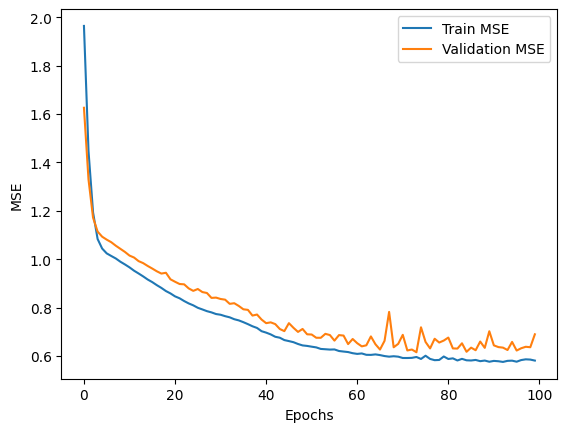

In [45]:
# Model with Different Learning Rate - 1
model_5 = create_ffnn()
history_5 = train_model(model_5,learning_rate=0.05)

# Plot Training & Validation Loss
plt.plot(history_5.history['loss'], label='Train MSE')
plt.plot(history_5.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/100
32/32 - 1s - 25ms/step - loss: 2.8400 - mse: 2.8400 - val_loss: 2.7441 - val_mse: 2.7441
Epoch 2/100
32/32 - 0s - 14ms/step - loss: 2.5176 - mse: 2.5176 - val_loss: 2.4689 - val_mse: 2.4689
Epoch 3/100
32/32 - 0s - 5ms/step - loss: 2.2821 - mse: 2.2821 - val_loss: 2.2586 - val_mse: 2.2586
Epoch 4/100
32/32 - 0s - 5ms/step - loss: 2.1065 - mse: 2.1065 - val_loss: 2.1033 - val_mse: 2.1033
Epoch 5/100
32/32 - 0s - 9ms/step - loss: 1.9784 - mse: 1.9784 - val_loss: 1.9843 - val_mse: 1.9843
Epoch 6/100
32/32 - 0s - 10ms/step - loss: 1.8831 - mse: 1.8831 - val_loss: 1.8985 - val_mse: 1.8985
Epoch 7/100
32/32 - 0s - 10ms/step - loss: 1.8162 - mse: 1.8162 - val_loss: 1.8395 - val_mse: 1.8395
Epoch 8/100
32/32 - 0s - 9ms/step - loss: 1.7704 - mse: 1.7704 - val_loss: 1.7944 - val_mse: 1.7944
Epoch 9/100
32/32 - 0s - 9ms/step - loss: 1.7364 - mse: 1.7364 - val_loss: 1.7599 - val_mse: 1.7599
Epoch 10/100
32/32 - 0s - 6ms/step - loss: 1.7109 - mse: 1.7109 - val_loss: 1.7363 - val_mse: 1.

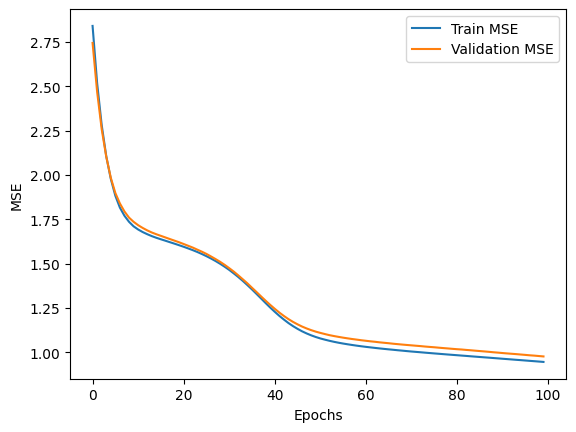

In [46]:
# Model with Different Learning Rate - 2
model_6 = create_ffnn()
history_6 = train_model(model_6,learning_rate=0.005)

# Plot Training & Validation Loss
plt.plot(history_6.history['loss'], label='Train MSE')
plt.plot(history_6.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/100
32/32 - 1s - 25ms/step - loss: 2.7551 - mse: 2.7551 - val_loss: 2.8034 - val_mse: 2.8034
Epoch 2/100
32/32 - 0s - 6ms/step - loss: 2.6908 - mse: 2.6908 - val_loss: 2.7430 - val_mse: 2.7430
Epoch 3/100
32/32 - 0s - 9ms/step - loss: 2.6319 - mse: 2.6319 - val_loss: 2.6876 - val_mse: 2.6876
Epoch 4/100
32/32 - 0s - 10ms/step - loss: 2.5779 - mse: 2.5779 - val_loss: 2.6360 - val_mse: 2.6360
Epoch 5/100
32/32 - 0s - 10ms/step - loss: 2.5276 - mse: 2.5276 - val_loss: 2.5873 - val_mse: 2.5873
Epoch 6/100
32/32 - 0s - 9ms/step - loss: 2.4802 - mse: 2.4802 - val_loss: 2.5425 - val_mse: 2.5425
Epoch 7/100
32/32 - 0s - 9ms/step - loss: 2.4366 - mse: 2.4366 - val_loss: 2.4991 - val_mse: 2.4991
Epoch 8/100
32/32 - 0s - 5ms/step - loss: 2.3944 - mse: 2.3944 - val_loss: 2.4592 - val_mse: 2.4592
Epoch 9/100
32/32 - 0s - 5ms/step - loss: 2.3558 - mse: 2.3558 - val_loss: 2.4215 - val_mse: 2.4215
Epoch 10/100
32/32 - 0s - 9ms/step - loss: 2.3193 - mse: 2.3193 - val_loss: 2.3856 - val_mse: 2.3

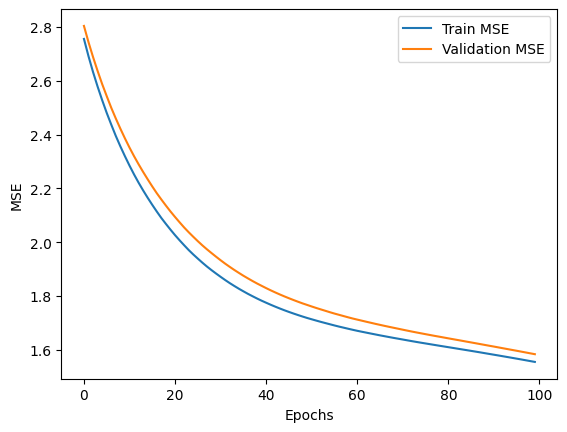

In [47]:
# Model with Different Learning Rate - 3
model_7 = create_ffnn()
history_7 = train_model(model_7,learning_rate=0.001)

# Plot Training & Validation Loss
plt.plot(history_7.history['loss'], label='Train MSE')
plt.plot(history_7.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/150
32/32 - 1s - 25ms/step - loss: 2.3490 - mse: 2.3490 - val_loss: 2.1559 - val_mse: 2.1559
Epoch 2/150
32/32 - 0s - 14ms/step - loss: 1.9825 - mse: 1.9825 - val_loss: 1.8590 - val_mse: 1.8590
Epoch 3/150
32/32 - 0s - 9ms/step - loss: 1.7399 - mse: 1.7399 - val_loss: 1.6373 - val_mse: 1.6373
Epoch 4/150
32/32 - 0s - 9ms/step - loss: 1.5616 - mse: 1.5616 - val_loss: 1.4779 - val_mse: 1.4779
Epoch 5/150
32/32 - 0s - 10ms/step - loss: 1.4296 - mse: 1.4296 - val_loss: 1.3669 - val_mse: 1.3669
Epoch 6/150
32/32 - 0s - 5ms/step - loss: 1.3331 - mse: 1.3331 - val_loss: 1.2824 - val_mse: 1.2824
Epoch 7/150
32/32 - 0s - 10ms/step - loss: 1.2555 - mse: 1.2555 - val_loss: 1.2143 - val_mse: 1.2143
Epoch 8/150
32/32 - 0s - 5ms/step - loss: 1.1905 - mse: 1.1905 - val_loss: 1.1644 - val_mse: 1.1644
Epoch 9/150
32/32 - 0s - 5ms/step - loss: 1.1395 - mse: 1.1395 - val_loss: 1.1252 - val_mse: 1.1252
Epoch 10/150
32/32 - 0s - 10ms/step - loss: 1.0995 - mse: 1.0995 - val_loss: 1.0958 - val_mse: 1

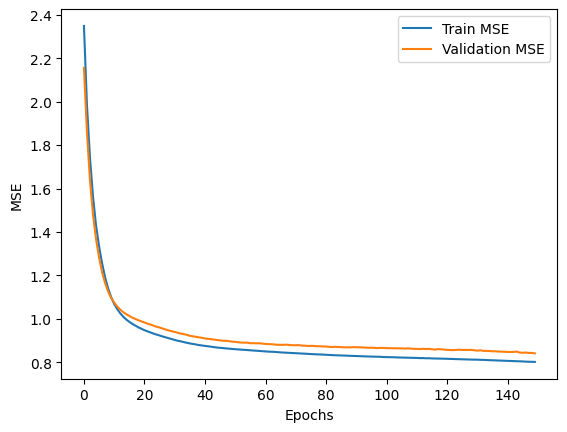

In [51]:
# Model with Different Epochs - 1
model_8 = create_ffnn(activation_functions=['tanh', 'leaky_relu', 'linear'])
history_8 = train_model(model_8,learning_rate=0.01,epochs=150)

# Plot Training & Validation Loss
plt.plot(history_8.history['loss'], label='Train MSE')
plt.plot(history_8.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

Epoch 1/225
32/32 - 1s - 26ms/step - loss: 2.5697 - mse: 2.5697 - val_loss: 2.3809 - val_mse: 2.3809
Epoch 2/225
32/32 - 0s - 5ms/step - loss: 2.2276 - mse: 2.2276 - val_loss: 2.1017 - val_mse: 2.1017
Epoch 3/225
32/32 - 0s - 10ms/step - loss: 1.9992 - mse: 1.9992 - val_loss: 1.9088 - val_mse: 1.9088
Epoch 4/225
32/32 - 0s - 5ms/step - loss: 1.8414 - mse: 1.8414 - val_loss: 1.7773 - val_mse: 1.7773
Epoch 5/225
32/32 - 0s - 5ms/step - loss: 1.7334 - mse: 1.7334 - val_loss: 1.6842 - val_mse: 1.6842
Epoch 6/225
32/32 - 0s - 5ms/step - loss: 1.6543 - mse: 1.6543 - val_loss: 1.6144 - val_mse: 1.6144
Epoch 7/225
32/32 - 0s - 5ms/step - loss: 1.5912 - mse: 1.5912 - val_loss: 1.5567 - val_mse: 1.5567
Epoch 8/225
32/32 - 0s - 10ms/step - loss: 1.5374 - mse: 1.5374 - val_loss: 1.5061 - val_mse: 1.5061
Epoch 9/225
32/32 - 0s - 9ms/step - loss: 1.4870 - mse: 1.4870 - val_loss: 1.4596 - val_mse: 1.4596
Epoch 10/225
32/32 - 0s - 9ms/step - loss: 1.4380 - mse: 1.4380 - val_loss: 1.4145 - val_mse: 1.4

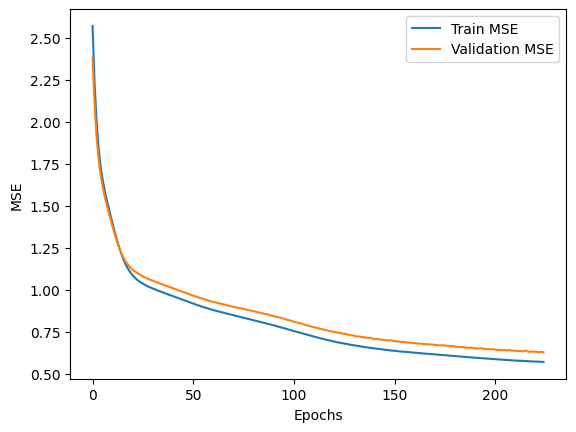

In [49]:
# Model with Different Epochs - 1
model_9 = create_ffnn(activation_functions=['tanh', 'leaky_relu', 'linear'])
history_9 = train_model(model_9,learning_rate=0.01,epochs=225)

# Plot Training & Validation Loss
plt.plot(history_9.history['loss'], label='Train MSE')
plt.plot(history_9.history['val_loss'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [52]:
print(history_9.history['loss'][-1])
print(model_9.evaluate(X_train,Y_train,verbose=0))

0.5703062415122986
[0.5679970383644104, 0.5679970383644104]


In [53]:
#Best Params for model
val_loss_list = []
train_loss_list = []

for i in range(6,41,2):
  model_complex_1 = create_ffnn(hidden_layers=[i+2,i,i],activation_functions=['tanh', 'leaky_relu', 'linear'])
  history_complex_1 = train_model(model_complex_1,learning_rate=0.01,epochs=100)
  model_complex_2 = create_ffnn(hidden_layers=[i+2,i+2,i],activation_functions=['tanh', 'leaky_relu', 'linear'])
  history_complex_2 = train_model(model_complex_2,learning_rate=0.01,epochs=100)
  model_complex_3 = create_ffnn(hidden_layers=[i+2,i+2,i+2],activation_functions=['tanh', 'leaky_relu', 'linear'])
  history_complex_3 = train_model(model_complex_3,learning_rate=0.01,epochs=100)
  train_loss_list.append(history_complex_1.history['loss'][-1])
  train_loss_list.append(history_complex_2.history['loss'][-1])
  train_loss_list.append(history_complex_3.history['loss'][-1])
  val_loss_list.append(history_complex_1.history['val_loss'][-1])
  val_loss_list.append(history_complex_2.history['val_loss'][-1])
  val_loss_list.append(history_complex_3.history['val_loss'][-1])



Görüntülenen çıkış son 5000 satıra kısaltıldı.
Epoch 1/100
32/32 - 2s - 56ms/step - loss: 2.4288 - mse: 2.4288 - val_loss: 2.0617 - val_mse: 2.0617
Epoch 2/100
32/32 - 0s - 13ms/step - loss: 1.7754 - mse: 1.7754 - val_loss: 1.5901 - val_mse: 1.5901
Epoch 3/100
32/32 - 0s - 5ms/step - loss: 1.4165 - mse: 1.4165 - val_loss: 1.3140 - val_mse: 1.3140
Epoch 4/100
32/32 - 0s - 6ms/step - loss: 1.2000 - mse: 1.2000 - val_loss: 1.1412 - val_mse: 1.1412
Epoch 5/100
32/32 - 0s - 9ms/step - loss: 1.0571 - mse: 1.0571 - val_loss: 1.0301 - val_mse: 1.0301
Epoch 6/100
32/32 - 0s - 9ms/step - loss: 0.9643 - mse: 0.9643 - val_loss: 0.9633 - val_mse: 0.9633
Epoch 7/100
32/32 - 0s - 5ms/step - loss: 0.9092 - mse: 0.9092 - val_loss: 0.9269 - val_mse: 0.9269
Epoch 8/100
32/32 - 0s - 10ms/step - loss: 0.8782 - mse: 0.8782 - val_loss: 0.9061 - val_mse: 0.9061
Epoch 9/100
32/32 - 0s - 9ms/step - loss: 0.8597 - mse: 0.8597 - val_loss: 0.8928 - val_mse: 0.8928
Epoch 10/100
32/32 - 0s - 9ms/step - loss: 0.8468 

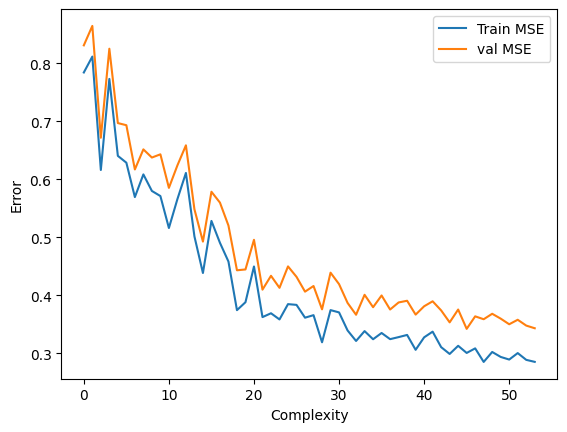

In [54]:

plt.plot(train_loss_list, label='Train MSE')
plt.plot(val_loss_list, label='val MSE')
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

In [55]:
#Best Params for model
val_loss_list = []
train_loss_list = []

for i in range(1,8):
  model_complex_1 = create_ffnn(hidden_layers=[6*i,i,i],activation_functions=['tanh', 'leaky_relu', 'linear'])
  history_complex_1 = train_model(model_complex_1,learning_rate=0.01,epochs=100)
  model_complex_2 = create_ffnn(hidden_layers=[6*i,6*i,i],activation_functions=['tanh', 'leaky_relu', 'linear'])
  history_complex_2 = train_model(model_complex_2,learning_rate=0.01,epochs=100)
  model_complex_3 = create_ffnn(hidden_layers=[6*i,6*i,6*i],activation_functions=['tanh', 'leaky_relu', 'linear'])
  history_complex_3 = train_model(model_complex_3,learning_rate=0.01,epochs=100)
  train_loss_list.append(history_complex_1.history['loss'][-1])
  train_loss_list.append(history_complex_2.history['loss'][-1])
  train_loss_list.append(history_complex_3.history['loss'][-1])
  val_loss_list.append(history_complex_1.history['val_loss'][-1])
  val_loss_list.append(history_complex_2.history['val_loss'][-1])
  val_loss_list.append(history_complex_3.history['val_loss'][-1])



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 1s - 31ms/step - loss: 2.5191 - mse: 2.5191 - val_loss: 2.3950 - val_mse: 2.3950
Epoch 2/100
32/32 - 0s - 12ms/step - loss: 2.2312 - mse: 2.2312 - val_loss: 2.1289 - val_mse: 2.1289
Epoch 3/100
32/32 - 0s - 9ms/step - loss: 2.0063 - mse: 2.0063 - val_loss: 1.9231 - val_mse: 1.9231
Epoch 4/100
32/32 - 0s - 9ms/step - loss: 1.8337 - mse: 1.8337 - val_loss: 1.7603 - val_mse: 1.7603
Epoch 5/100
32/32 - 0s - 10ms/step - loss: 1.6963 - mse: 1.6963 - val_loss: 1.6371 - val_mse: 1.6371
Epoch 6/100
32/32 - 0s - 15ms/step - loss: 1.5896 - mse: 1.5896 - val_loss: 1.5322 - val_mse: 1.5322
Epoch 7/100
32/32 - 0s - 6ms/step - loss: 1.5015 - mse: 1.5015 - val_loss: 1.4532 - val_mse: 1.4532
Epoch 8/100
32/32 - 0s - 6ms/step - loss: 1.4322 - mse: 1.4322 - val_loss: 1.3959 - val_mse: 1.3959
Epoch 9/100
32/32 - 0s - 10ms/step - loss: 1.3788 - mse: 1.3788 - val_loss: 1.3508 - val_mse: 1.3508
Epoch 10/100
32/32 - 0s - 9ms/step - loss: 1.3377 - mse: 1.3377 - val_loss: 1.3142 - val_mse: 1.3142
Epoch 

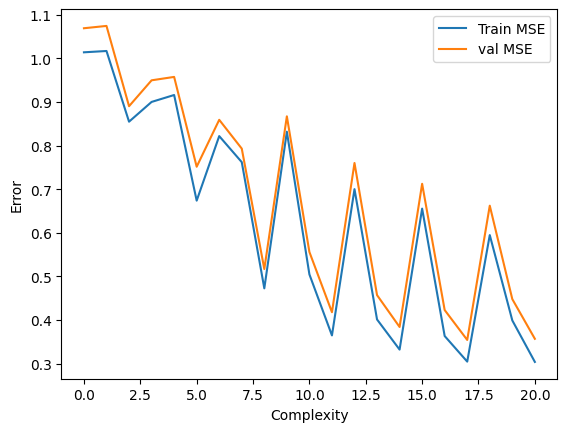

In [56]:

plt.plot(train_loss_list, label='Train MSE')
plt.plot(val_loss_list, label='val MSE')
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

In [61]:

# Calculate the increased training data size
increased_size = int(N_t * 0.1)
new_N_t = N_t + increased_size

# Generate additional training data
X_train_add, Y_train_add = generate_data(increased_size, seed=101) # Use a different seed for new data

# Concatenate the original and additional data
X_train_increased = np.concatenate((X_train, X_train_add))
Y_train_increased = np.concatenate((Y_train, Y_train_add))

# Verify new training data size
print(f"Original training data size: {N_t}")
print(f"Increased training data size: {increased_size}")
print(f"New training data size: {len(X_train_increased)}")



Original training data size: 1000
Increased training data size: 100
New training data size: 1100


In [62]:
#Best Params for model
val_loss_list = []
train_loss_list = []

for i in range(6,41,2):
  model_complex_1 = create_ffnn(hidden_layers=[i+2,i,i],activation_functions=['tanh', 'leaky_relu', 'linear'])
  history_complex_1 = train_model(model_complex_1,learning_rate=0.01,epochs=100,X_train=X_train_increased,Y_train=Y_train_increased)
  model_complex_2 = create_ffnn(hidden_layers=[i+2,i+2,i],activation_functions=['tanh', 'leaky_relu', 'linear'])
  history_complex_2 = train_model(model_complex_2,learning_rate=0.01,epochs=100,X_train=X_train_increased,Y_train=Y_train_increased)
  model_complex_3 = create_ffnn(hidden_layers=[i+2,i+2,i+2],activation_functions=['tanh', 'leaky_relu', 'linear'])
  history_complex_3 = train_model(model_complex_3,learning_rate=0.01,epochs=100,X_train=X_train_increased,Y_train=Y_train_increased)
  train_loss_list.append(history_complex_1.history['loss'][-1])
  train_loss_list.append(history_complex_2.history['loss'][-1])
  train_loss_list.append(history_complex_3.history['loss'][-1])
  val_loss_list.append(history_complex_1.history['val_loss'][-1])
  val_loss_list.append(history_complex_2.history['val_loss'][-1])
  val_loss_list.append(history_complex_3.history['val_loss'][-1])



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Epoch 1/100
35/35 - 1s - 32ms/step - loss: 2.3142 - mse: 2.3142 - val_loss: 1.8346 - val_mse: 1.8346
Epoch 2/100
35/35 - 0s - 14ms/step - loss: 1.4912 - mse: 1.4912 - val_loss: 1.3354 - val_mse: 1.3354
Epoch 3/100
35/35 - 0s - 10ms/step - loss: 1.1845 - mse: 1.1845 - val_loss: 1.1545 - val_mse: 1.1545
Epoch 4/100
35/35 - 0s - 5ms/step - loss: 1.0696 - mse: 1.0696 - val_loss: 1.0744 - val_mse: 1.0744
Epoch 5/100
35/35 - 0s - 5ms/step - loss: 1.0096 - mse: 1.0096 - val_loss: 1.0279 - val_mse: 1.0279
Epoch 6/100
35/35 - 0s - 9ms/step - loss: 0.9708 - mse: 0.9708 - val_loss: 0.9970 - val_mse: 0.9970
Epoch 7/100
35/35 - 0s - 5ms/step - loss: 0.9432 - mse: 0.9432 - val_loss: 0.9744 - val_mse: 0.9744
Epoch 8/100
35/35 - 0s - 8ms/step - loss: 0.9220 - mse: 0.9220 - val_loss: 0.9560 - val_mse: 0.9560
Epoch 9/100
35/35 - 0s - 9ms/step - loss: 0.9040 - mse: 0.9040 - val_loss: 0.9389 - val_mse: 0.9389
Epoch 10/100
35/35 - 0s - 6ms/step - loss: 0.8875 

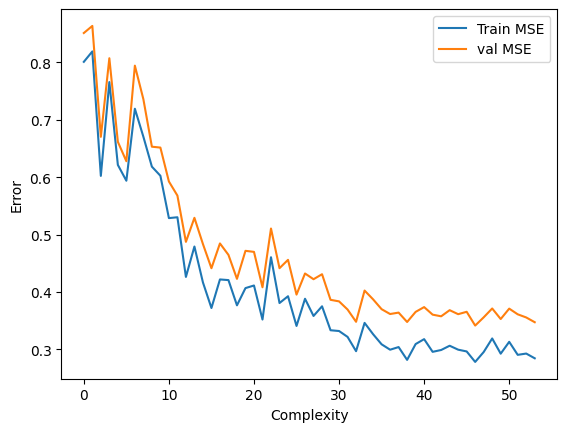

In [63]:

plt.plot(train_loss_list, label='Train MSE')
plt.plot(val_loss_list, label='val MSE')
plt.xlabel('Complexity')
plt.ylabel('Error')
plt.legend()
plt.show()

##Results:

###Step 5 : First Model Train Loss Validation over Epoch Graph with given params

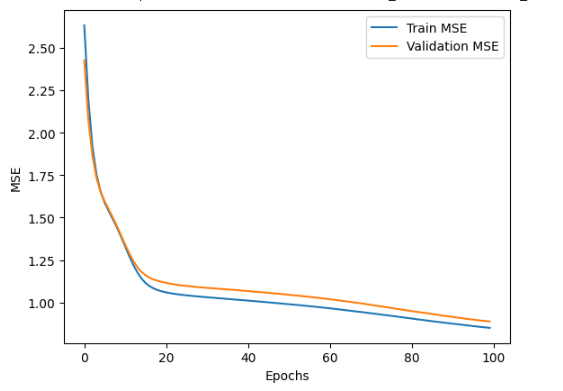

### Step 6:  Train Validation Loss of Deep Learning Model over Epoch with Different Set of Activation Functions

#### activation_functions=['tanh', 'leaky_relu', 'linear']

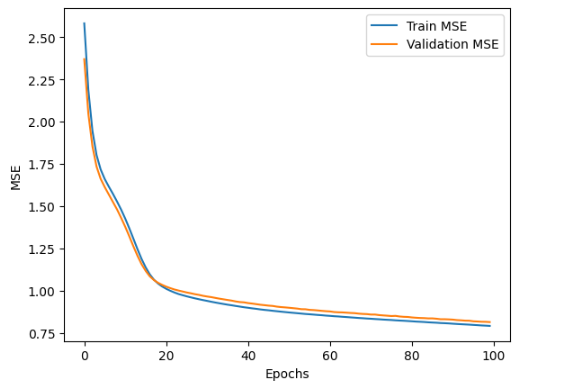

#### activation_functions=['relu', 'relu', 'linear']

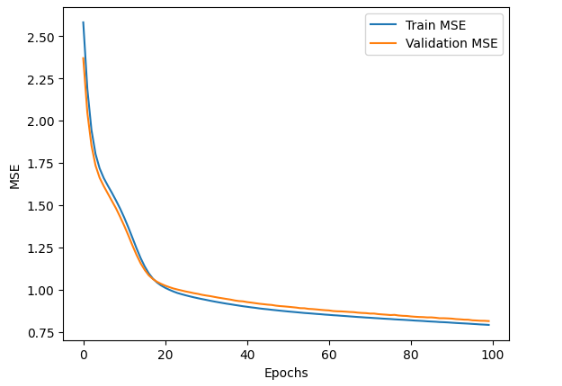

#### activation_functions=['tanh', 'leaky_relu', 'leaky_relu']

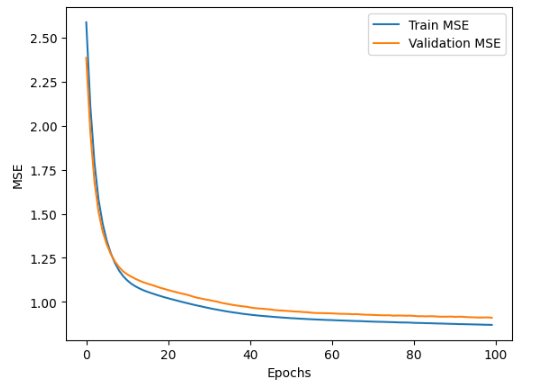

### Step 6: Train Validation Loss of Model over Epoch with Different Learning Rates :


#### Learning Rate = 0.05

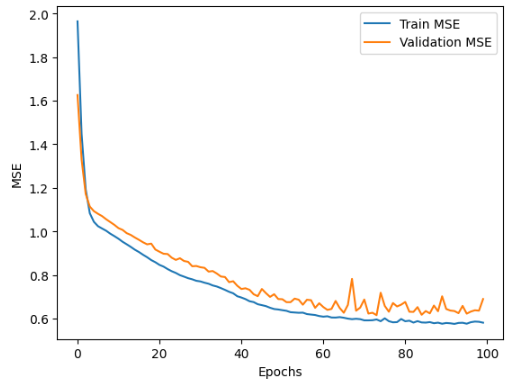

#### Learning Rate = 0.005

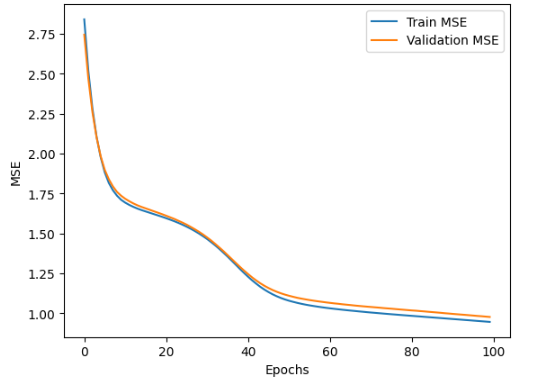

#### Learning Rate = 0.001

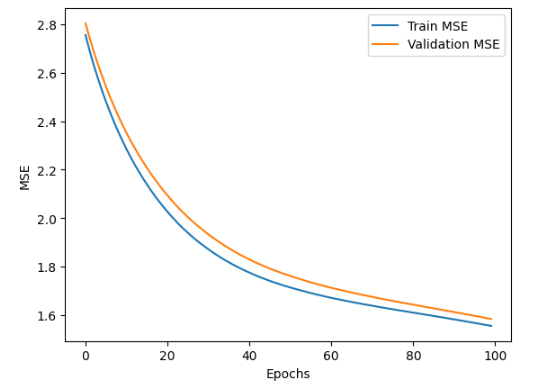

### Step 6: Train Validation Loss of Model over Epoch with Different Epochs :

#### Epoch increased %50 = 150 Epoch

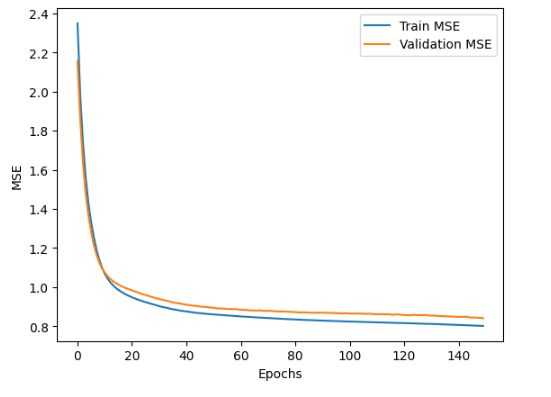

#### Epoch increased %50 more = 225 Epoch

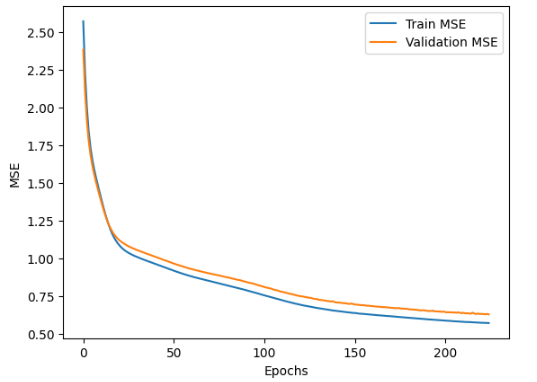

### Step 7: Train Validation Loss of Model with Best Params

- Epoch = 225
- Learning Rate = 0.01
- Activation Functions = ['tanh', 'leaky_relu', 'linear']


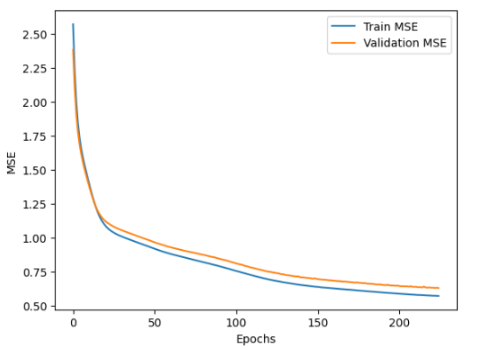

### Step 8: Add new nodes at a time to each hidden layer :

#### This process continue until each hidden layer reach the 80 nodes

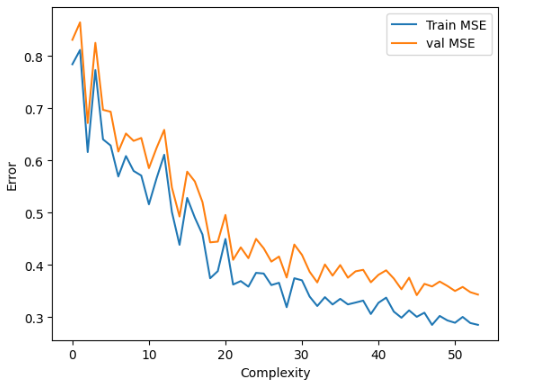

#### Then I tried to double node counts each time like 12,24,48,96,192,... It reached 720 nodes for each layer

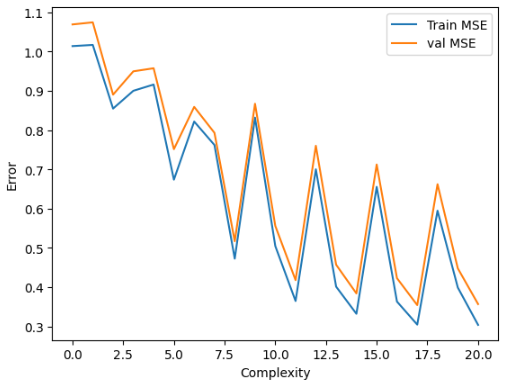

### Step 9 : Increased Training Data as %10 and Repeat Step 8

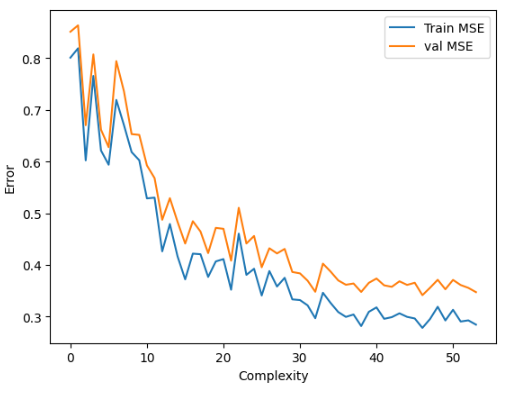

## Comments and Discussions :

- 1000 data pairs(-1 to 1) for training and 500 data pairs for validation generated using given polynomal equations.

- Noise added to %30 of 1000 data training data.

- There is a seed value for this part to generate same data during process.

- Increased noisy data up to a limit in dl model cause reduced to overfit and increasing the robustness of model. Therefore , its an important part.

- Deep Learning Model created using Keras library Sequantial to create Feed Forward Neural Network. Each hidden layer contains 6 nodes and same activation function in same layer. Also 8 input and 5 output contains.

- MSE is used for loss function and model trained using SGD.

### Step 5 :
1. Activation Functions = ['relu', 'tanh', 'tanh']
2. learning_rate=0.01
3. epochs=100

- Actually all of the params choosed randomly checking some interval of numbers and when look at the model , everyway it looks not good because mse is  0.8 for data between(-1,1). It was high value for this case probably but can not find better optimal solution . It could be about hidden layers , some layer changes could be solution because after step 8 i realized it reduce when complexity increase ( bias-variance problem) but layer changes except except node counts is not case of this project so i continued.

### Step 6:

- I realized by trying different combinations that the sigmoid function is not good for this problem and that being linear in the last layer and having a leaky relu in one of the layers gives better results in general.

- I also tried different learning rates and concluded that some learning rates (0.001) do not learn enough and are underfit, some (0.05) try to learn fast and do not learn properly and miss the global or local minima of the loss function, and I decided that 0.01 is the optimal learning rate.

- With the optimal learning rate and activation functions I chose, I noticed that it learned more and more as I increased the epoch amount by 50%, and I concluded that it learned by progressing optimally for the last 225 epochs I tried.

### Step 7:

- I choosed these params for my problem solution. These params given best results i have tried before. It learns optimal and not overfitting or underfitting also learning properly.Error was still high but i continued.
- Epoch = 225
- Learning Rate = 0.01
- Activation Functions = ['tanh', 'leaky_relu', 'linear']


### Step 8:

- First I increased the number of nodes in each layer by two and continued this process until I had 80 nodes in each layer, but I could not get the optimal bias-variance trade-off graph. Also, since this model is time consuming, I used epoch 100. Despite these values, the process took longer. Afterwards, I wanted to do a different experiment by taking two multiples (6,12,24,48,96,192) of the nodes in each layer continuously. I made 768 nodes in each layer this way, but I may not have achieved an optimal graph because I am constantly doubling it. Again, there was a graph that was constantly going down, but at some points it can be likened to the increase in errors when going to the high variance low bias part.

### Step 9:

- I continued by adding two nodes to each layer as I did in the first part in step 8, but I don't think there is a noticeable difference in the graph. However, I think that maybe the situation that should be here is that the error value decreases by moving both validation and training closer to the bottom of the graph, or that the gap between train and validation closes a little more and the model learns better.


#Part 2:

In [1]:
dataset_path = "/content/drive/MyDrive/Shapes/"

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define ImageDataGenerator with rescaling
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80% train, 20% test

# Load Training Data
train_generator = datagen.flow_from_directory(
    dataset_path + "Train/",
    target_size=(128, 128),
    color_mode="grayscale",  # Since we have grayscale images
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

# Load Validation Data
val_generator = datagen.flow_from_directory(
    dataset_path + "Train/",
    target_size=(128, 128),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 1319 images belonging to 7 classes.
Found 328 images belonging to 7 classes.


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modified_alexnet(input_shape=(128, 128, 1), num_classes=7):
    model = models.Sequential()

    # First Convolutional Layer (Modified for 1-Channel Input)
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (Change to 8 classes for shape classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create model
model = modified_alexnet()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │          28,679 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,733,767 (94.35 MB)

 Trainable params: 24,733,063 (94.35 MB)

 Non-trainable params: 704 (2.75 KB)

In [5]:
model.fit(train_generator, validation_data=val_generator, epochs=4, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 348s 8s/step - accuracy: 0.1565 - loss: 2.2073 - val_accuracy: 0.1829 - val_loss: 1.9401
Epoch 2/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.1583 - loss: 1.9394 - val_accuracy: 0.1555 - val_loss: 1.9411
Epoch 3/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.1867 - loss: 1.9155 - val_accuracy: 0.1555 - val_loss: 1.9424
Epoch 4/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.1878 - loss: 1.9038 - val_accuracy: 0.1555 - val_loss: 1.9616


In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modified_alexnet(input_shape=(128, 128, 1), num_classes=7):
    model = models.Sequential()

    # First Convolutional Layer (Modified for 1-Channel Input)
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (Change to 8 classes for shape classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create model
model = modified_alexnet()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │          28,679 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,733,767 (94.35 MB)

 Trainable params: 24,733,063 (94.35 MB)

 Non-trainable params: 704 (2.75 KB)

In [7]:
model.fit(train_generator, validation_data=val_generator, epochs=4, batch_size=32)


Epoch 1/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.1259 - loss: 2.2454 - val_accuracy: 0.1677 - val_loss: 1.9445
Epoch 2/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.1500 - loss: 1.9725 - val_accuracy: 0.1585 - val_loss: 1.9429
Epoch 3/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1813 - loss: 1.9409 - val_accuracy: 0.1646 - val_loss: 1.9397
Epoch 4/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.1924 - loss: 1.9130 - val_accuracy: 0.1860 - val_loss: 1.9374


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modified_alexnet(input_shape=(128, 128, 1), num_classes=7):
    model = models.Sequential()

    # First Convolutional Layer (Modified for 1-Channel Input)
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='sigmoid', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='tanh', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='tanh', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (Change to 8 classes for shape classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create model
model = modified_alexnet()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │          28,679 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,733,767 (94.35 MB)

 Trainable params: 24,733,063 (94.35 MB)

 Non-trainable params: 704 (2.75 KB)

In [9]:
model.fit(train_generator, validation_data=val_generator, epochs=4, batch_size=32)


Epoch 1/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1290 - loss: 2.0077 - val_accuracy: 0.1555 - val_loss: 1.9424
Epoch 2/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.1584 - loss: 1.9464 - val_accuracy: 0.1555 - val_loss: 1.9440
Epoch 3/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.1549 - loss: 1.9441 - val_accuracy: 0.1555 - val_loss: 1.9465
Epoch 4/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.1925 - loss: 1.9115 - val_accuracy: 0.1098 - val_loss: 1.9492


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modified_alexnet(input_shape=(128, 128, 1), num_classes=7):
    model = models.Sequential()

    # First Convolutional Layer (Modified for 1-Channel Input)
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='sigmoid', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='leaky_relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='tanh', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (Change to 8 classes for shape classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create model
model = modified_alexnet()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │          28,679 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,733,767 (94.35 MB)

 Trainable params: 24,733,063 (94.35 MB)

 Non-trainable params: 704 (2.75 KB)

In [11]:
model.fit(train_generator, validation_data=val_generator, epochs=4, batch_size=32)


Epoch 1/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.1538 - loss: 2.0184 - val_accuracy: 0.1098 - val_loss: 1.9530
Epoch 2/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.1232 - loss: 1.9972 - val_accuracy: 0.1341 - val_loss: 1.9461
Epoch 3/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.1674 - loss: 1.9352 - val_accuracy: 0.1555 - val_loss: 1.9437
Epoch 4/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.1808 - loss: 1.9148 - val_accuracy: 0.1555 - val_loss: 1.9447


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modified_alexnet(input_shape=(128, 128, 1), num_classes=7):
    model = models.Sequential()

    # First Convolutional Layer (Modified for 1-Channel Input)
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4505, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4505, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (Change to 8 classes for shape classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create model
model = modified_alexnet()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 30, 30, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4505)                │       4,617,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4505)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4505)                │      20,299,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 4505)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 7)                   │          31,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,674,073 (109.38 MB)

 Trainable params: 28,673,369 (109.38 MB)

 Non-trainable params: 704 (2.75 KB)

In [15]:
model.fit(train_generator, validation_data=val_generator, epochs=4, batch_size=32)


Epoch 1/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1345 - loss: 2.1322 - val_accuracy: 0.1585 - val_loss: 1.9451
Epoch 2/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.1869 - loss: 1.9715 - val_accuracy: 0.1555 - val_loss: 1.9430
Epoch 3/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.1424 - loss: 1.9467 - val_accuracy: 0.1555 - val_loss: 1.9408
Epoch 4/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.1872 - loss: 1.9023 - val_accuracy: 0.1555 - val_loss: 1.9399


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modified_alexnet(input_shape=(128, 128, 1), num_classes=7):
    model = models.Sequential()

    # First Convolutional Layer (Modified for 1-Channel Input)
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4505, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4505, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (Change to 8 classes for shape classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create model
model = modified_alexnet()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 30, 30, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4505)                │       4,617,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4505)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 4505)                │      20,299,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 4505)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 7)                   │          31,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,674,073 (109.38 MB)

 Trainable params: 28,673,369 (109.38 MB)

 Non-trainable params: 704 (2.75 KB)

In [17]:
model.fit(train_generator, validation_data=val_generator, epochs=4, batch_size=32)


Epoch 1/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1349 - loss: 2.2799 - val_accuracy: 0.1555 - val_loss: 1.9417
Epoch 2/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.1700 - loss: 1.9390 - val_accuracy: 0.1524 - val_loss: 1.9495
Epoch 3/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.1516 - loss: 1.9244 - val_accuracy: 0.1555 - val_loss: 1.9615
Epoch 4/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.1800 - loss: 1.8931 - val_accuracy: 0.1494 - val_loss: 2.0238


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modified_alexnet(input_shape=(128, 128, 1), num_classes=7):
    model = models.Sequential()

    # First Convolutional Layer (Modified for 1-Channel Input)
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='sigmoid', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='leaky_relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='tanh', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(4505, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4505, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (Change to 8 classes for shape classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create model
model = modified_alexnet()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 30, 30, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4505)                │       4,617,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 4505)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 4505)                │      20,299,530 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 4505)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 7)                   │          31,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,674,073 (109.38 MB)

 Trainable params: 28,673,369 (109.38 MB)

 Non-trainable params: 704 (2.75 KB)

In [19]:
model.fit(train_generator, validation_data=val_generator, epochs=4, batch_size=32)


Epoch 1/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.1542 - loss: 1.9936 - val_accuracy: 0.1555 - val_loss: 1.9472
Epoch 2/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.1686 - loss: 1.9536 - val_accuracy: 0.1555 - val_loss: 1.9443
Epoch 3/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.1670 - loss: 1.9465 - val_accuracy: 0.1555 - val_loss: 1.9422
Epoch 4/4
42/42 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.1778 - loss: 1.9161 - val_accuracy: 0.1555 - val_loss: 1.9422


In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

def modified_alexnet(input_shape=(128, 128, 1), num_classes=7):
    model = models.Sequential()

    # First Convolutional Layer (Modified for 1-Channel Input)
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Third, Fourth, and Fifth Convolutional Layers
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flattening
    model.add(layers.Flatten())

    # Fully Connected Layers
    model.add(layers.Dense(5180, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(5180, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer (Change to 8 classes for shape classification)
    model.add(layers.Dense(6, activation='softmax'))

    return model

# Create model
model = modified_alexnet()
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 30, 30, 96)          │          11,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 30, 30, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 14, 14, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 6, 6, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 5180)                │       5,309,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 5180)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 5180)                │      26,837,580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 5180)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 6)                   │          31,086 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,903,542 (136.96 MB)

 Trainable params: 35,902,838 (136.96 MB)

 Non-trainable params: 704 (2.75 KB)

## Results:


### Part 2:

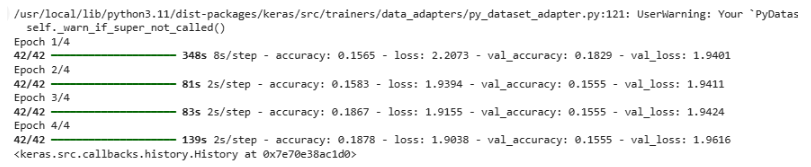

### Part 3:

####Accuracy with Learning rate 0.01:

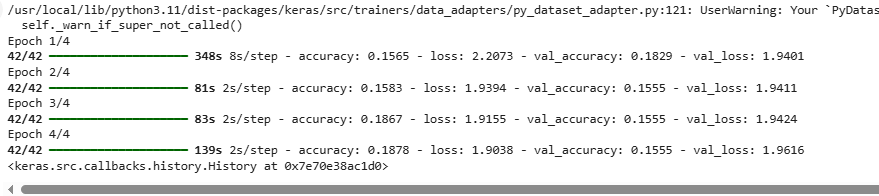

#### Accuracy with Learning rate 0.001:

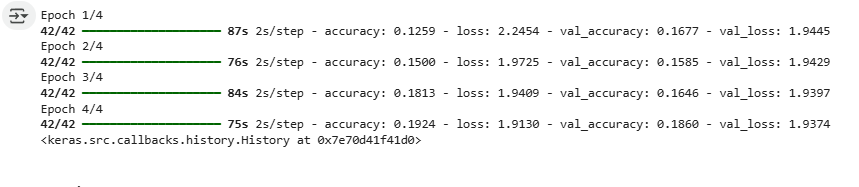

####1st Sigmoid 3rd and 5th tanh for activation functions:

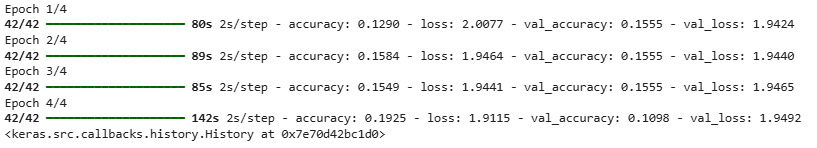

#### 2nd sigmoid 4th leaky_relu 5th tanh for activation functions:

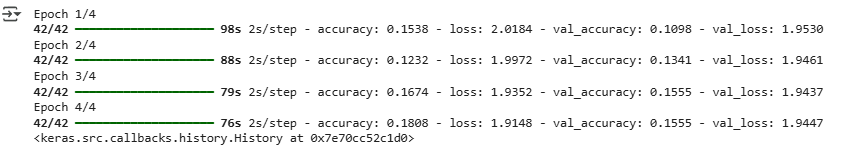

### Part 4:

#### %10 increased fully connected layer nodes (4096-> 4505)

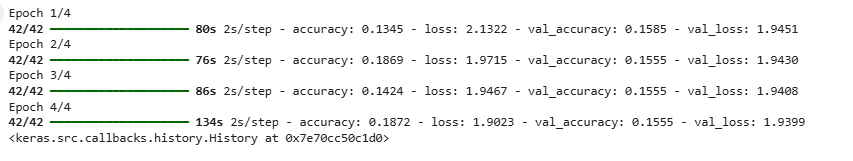

##### Learning rate 0.01:

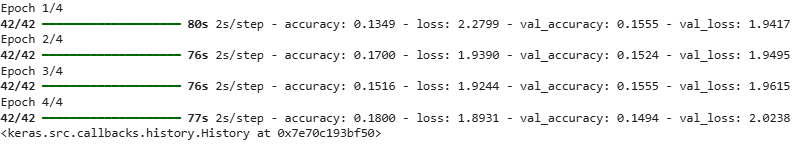

##### 2nd sigmoid 4th leaky_relu 5th tanh for activation functions:

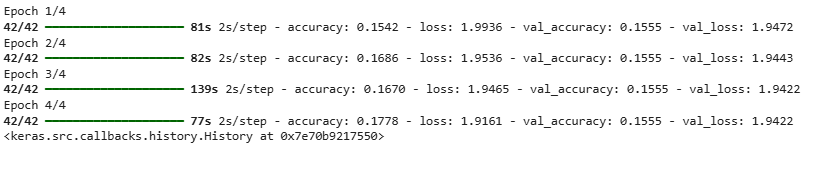

## Comments and Discussions:

### 128x128 image generation

I used 2D Shape library to generate image . After generated image was 255x255 and it did not contain noise. So i resize it to 128x128 and added noise to images. I can not find how to generate triangle , I examined the files but I could not find an input generation part related to the triangle, I may have missed it.%80 of data used for training and %20 for testing. Cross validation also helps to optimal model but models takes time to generate.(can't deliver on time properly if i try it)

- My input is 7 because i can not generate triangle so my output is 7 too . i need to indicate it again.

- Example generate shape:

!python main.py --shapes star5 --to_transform trx try scale rota --num_transformation 3 --canvas_bccol 0 0 0 --stim_colour 255 255 255

This code generates cartesian product of translation on x, translation on y ,scale and rotation so it generate 3x3x3x3 = 81 images.

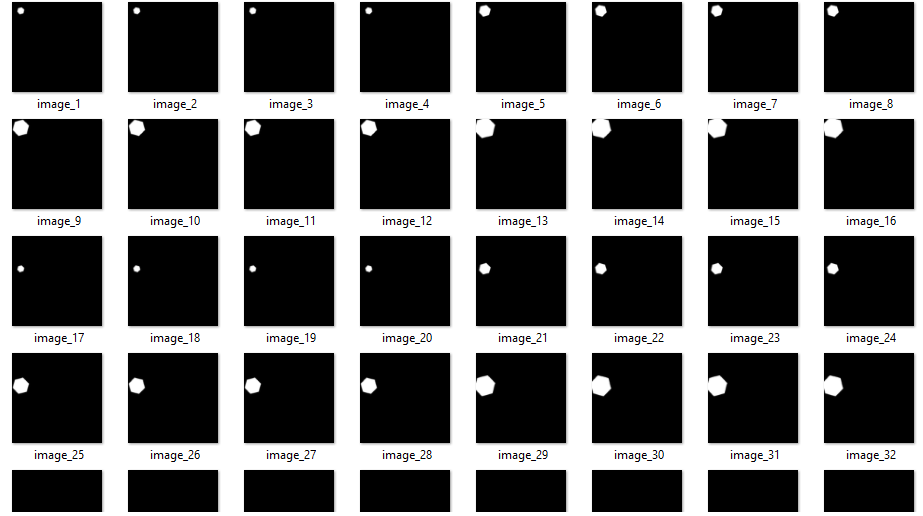

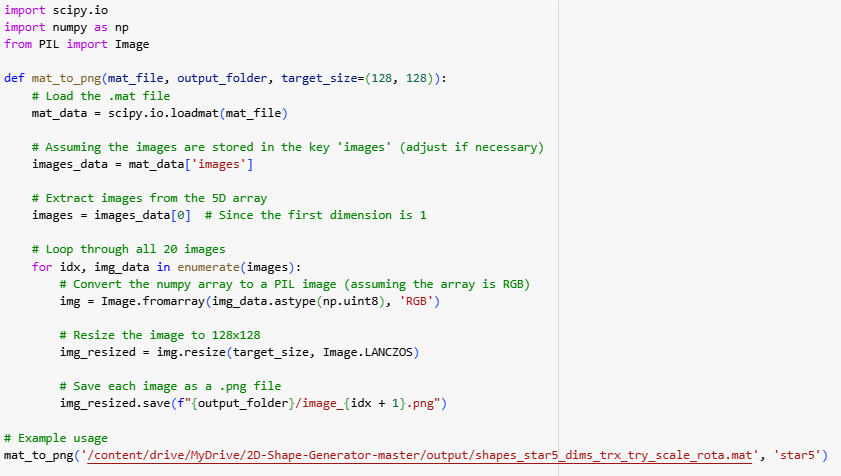

### AlexNet Model - Part2

After dataset provided , alexnet model generated with below settings.

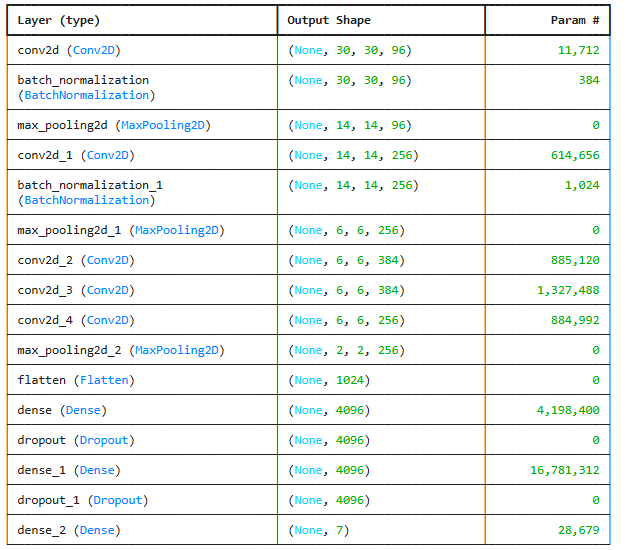

Model Results : accuracy: 0.1878 - loss: 1.9038 - val_accuracy: 0.1555 - val_loss: 1.9616

- It has too low accuracy %15-18.
- I used really low epoch values because it takes times to train.(wouldn't have made it on time.)


### Part 3:

- Learning rate 0.001 created more accurate model %18-19
- Learning rate 0.001 is better between i used so i choose it.
- First relu changed as sigmoid also third and fifth convolutional layers changed as tanh. Accuracy is still validation accuracy is terrible it drops to %10's (probably underfit but seems like overfit because train_validation still %19 even this bad results).
- 2nd sigmoid 4th leaky_relu 5th tanh for activation functions and this model accuracy still between %15-18.
- Sigmoid , tanh , relu , leaky relu are really good activation functions for CNN architecture. Different combinations tried and i will continue with based alexnet architecture.

### Part 4:

- Fully connected layer nodes increased %10 and 4096 to 4505.
- Although the accuracy decreased, the validation loss also decreased, but I think that increasing the model complexity will increase the validation loss as in the bias-variance trade-off graph.
- Learning rate 0.01 which is not selected gave similar result accuracy is decreased to %18.0 and also validation lose increased.
- After tried with different activation functions accuracy rate is not increase also validation error increase.
- Then fully connected layer increased %15 and output layer 1 decreased.
- The last part of removing layer can not handled correct way . Probably accuracy will increase because class count decrease even complexity increase.
